#Problème du voyageur de commerce

Résolution par méthode stochastique

In [ ]:
#importer les librairies nécessaires
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
import time
import seaborn as sns
import pandas as pd

In [ ]:
#coords une liste de coordonnees
class ProbVC:

  def __init__(self,coords):
    self.coords=coords
    self.m=len(coords)

  def affichage(self,s=None,method=None):
    coords=self.coords
    #for coord in coords:
      #plt.plot(coord[0], coord[1], 'r')
    if s is None:
      for i in range(self.m-1):
          plt.plot((coords[i][0],coords[i+1][0]),(coords[i][1], coords[i+1][1]))
      plt.plot((coords[self.m-1][0], coords[0][0]),(coords[self.m-1][1], coords[0][1]))
    elif method!=None:
      for i in range(self.m-1):
          plt.plot((coords[s[i]][0],coords[s[i+1]][0]),(coords[s[i]][1], coords[s[i+1]][1]))
      plt.plot((coords[s[self.m-1]][0], coords[s[0]][0]),(coords[s[self.m-1]][1], coords[s[0]][1]))
      
  def coût(self,s): 
    coords=self.coords
    j=0
    for i in range(1,len(s),1):
       j+=np.sqrt((coords[s[i]][0]-coords[s[i-1]][0])**2+(coords[s[i]][1]-coords[s[i-1]][1])**2)
    j=j+np.sqrt((coords[s[len(s)-1]][0]-coords[s[0]][0])**2+(coords[s[len(s)-1]][0]-coords[s[0]][0])**2)
    return j

      
 
  def randomVoisin(self,s):
    s_voisin=np.copy(s)
    i,j=random.randint(0,len(s)), random.randint(0,len(s))
    s_voisin[i],s_voisin[j]=s_voisin[j],s_voisin[i]
    return s_voisin

  def tousLesVoisins(self,s):  
    L=[]
    for i in range(self.m):
      for j in range(i+1,self.m):
          s_voisin=np.copy(s)
          s_voisin[i],s_voisin[j]=s_voisin[j],s_voisin[i]
          L.append(s_voisin)
    return L

    # return random.shuffle(s)
  def argmin_J(self,s, p):
    L=self.tousLesVoisins(s)
    List_cout=[]
    for i in range(len(L)):
      List_cout.append(self.coût(L[i]))
      ind=List_cout.index(min(List_cout))
    return L[ind]

In [ ]:
#tirer une solutions au hasard
def solution_hasard(Pb):
  n=Pb.m
  s= np.random.permutation(range(n))
  #S=[]
  #for i in s:
    #S.append(Pb.coords[i])
  return s

In [ ]:
#s= np.random.permutation(range(n))

In [ ]:
#MonteCarlo
def Mont_carlo(N,Pb):
  J1=float('inf')
  for i in range(1, N, 1):
    s= np.random.permutation(range(n))
    if Pb.coût(s)<J1:
      J1=Pb.coût(s)
      s1=s
  return s1




In [ ]:
#Glouton
def Glouton(s,Pb):
  J1=np.float('inf')
  while Pb.coût(s)<J1:
    J1=Pb.coût(s)
    s=Pb.argmin_J(s, Pb.coords)
  return s



In [ ]:
#GloutonAléatoire
def GloutonAleat(N,s,Pb):
  J1=np.float('inf')
  for i in range(1,N,1):
    s1=solution_hasard(Pb)
    if Pb.coût(s1)<Pb.coût(s):
      J1=Pb.coût(s1)
      s=s1
  return s

In [ ]:
#Méthode du Tabou
def Tabou(s,K,Pb):
  J1=float('inf')
  Tabou=[]
  for i in range(1, len(s),1):
    if Pb.coût(s)<J1:
      J1=Pb.coût(s)
      s1=s
      Tabou.append(s)
    if len(Tabou)>K:
      Tabou.pop(0)
    s=Pb.argmin_J(s, Tabou)
  return s1


#Phase des Tests 

#Test 1 : n=10

In [ ]:
List_temps=[]
List_dist=[]
List_Algo=['Monte_Carlo','Glouton','GloutonAlea','Tabou']

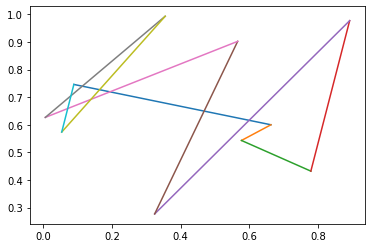

In [ ]:
n=10
N=1000
K=25
coords = np.random.random(2 *n)
coords = coords.reshape(n, 2)
Pb=ProbVC(coords)
Pb.affichage()
sol=solution_hasard(Pb)


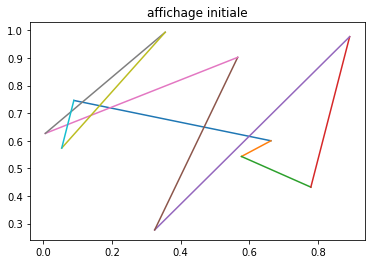

In [ ]:
Pb.affichage()
plt.title('affichage initiale')
plt.show()

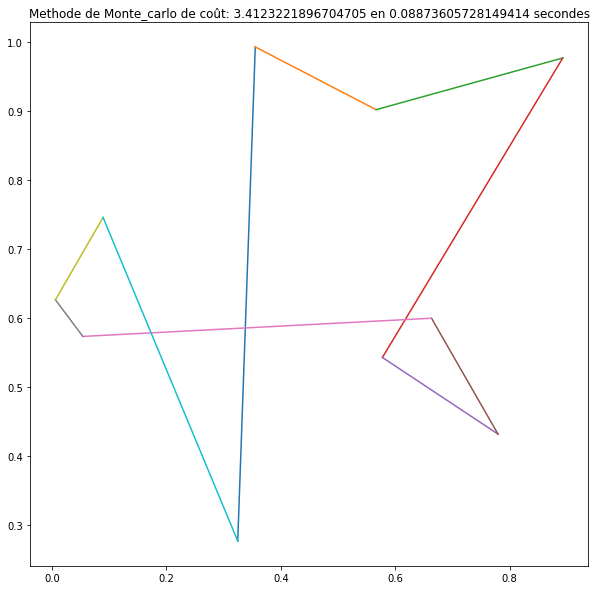

In [ ]:
start_time = time.time()
Solution=Mont_carlo(N,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='Monte_carlo')
plt.title('Methode de Monte_carlo de coût: ' + str(Pb.coût(Solution))+ ' en ' + str(total_time) + ' secondes')
plt.show()

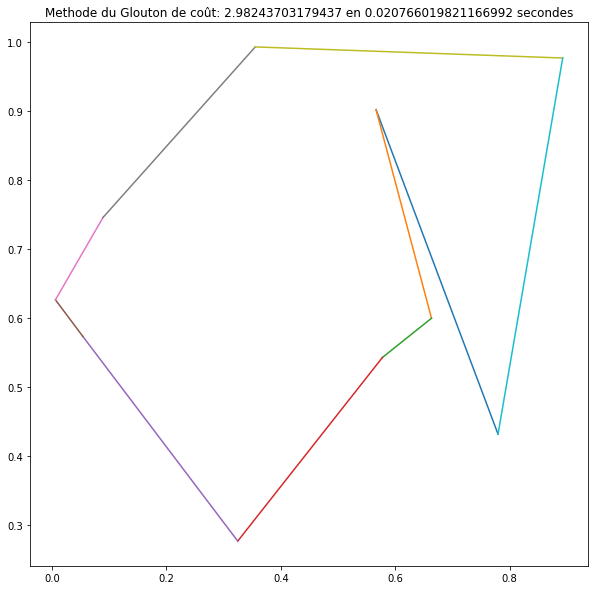

In [ ]:
start_time = time.time()
Solution=Glouton(sol,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='Glouton')
plt.title('Methode du Glouton de coût: ' + str(Pb.coût(Solution)) + ' en ' + str(total_time) + ' secondes')
plt.show()

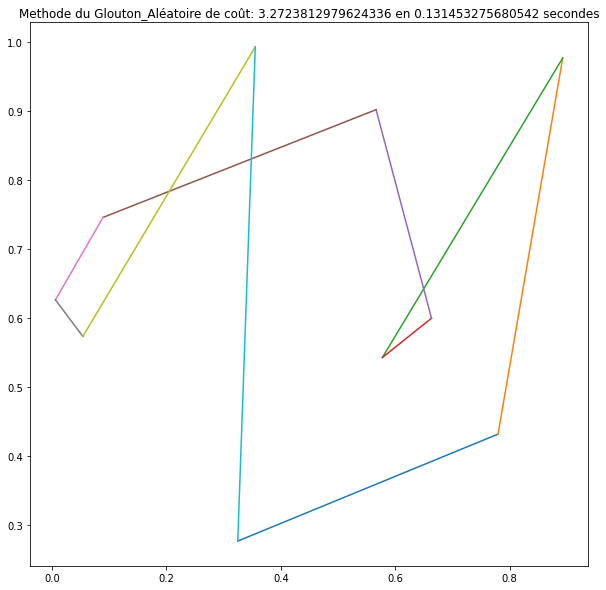

In [ ]:
start_time = time.time()
Solution=GloutonAleat(N,sol,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='GloutonAleat')
plt.title('Methode du Glouton_Aléatoire de coût: ' + str(Pb.coût(Solution)) + ' en ' + str(total_time) + ' secondes')
plt.show()

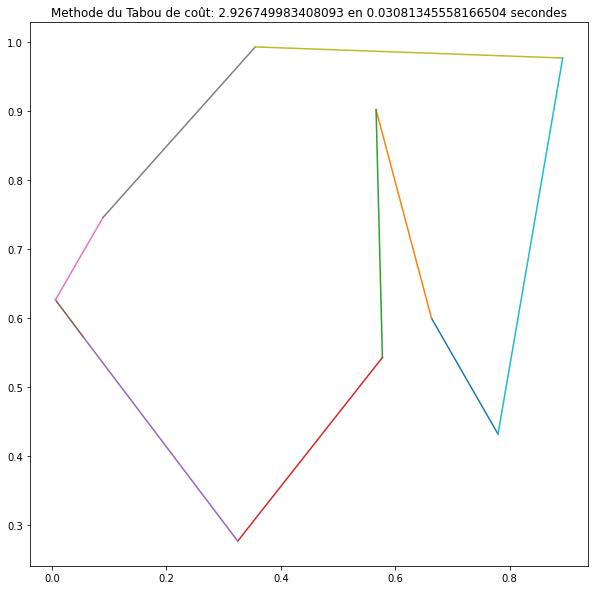

In [ ]:
start_time = time.time()
Solution=Tabou(sol,K,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='Tabou')
plt.title('Methode du Tabou de coût: ' + str(Pb.coût(Solution))+ ' en ' + str(total_time) + ' secondes')
plt.show()

In [ ]:
List_temps

[0.08873605728149414,
 0.020766019821166992,
 0.131453275680542,
 0.03081345558166504]

In [ ]:
List_dist

[3.4123221896704705, 2.98243703179437, 3.2723812979624336, 2.926749983408093]

In [ ]:
df = pd.DataFrame(dict(List_Algo=List_Algo,List_temps=List_temps, List_dist=List_dist))

In [ ]:
df

,List_Algo,List_temps,List_dist
0,Monte_Carlo,0.088736,3.412322
1,Glouton,0.020766,2.982437
2,GloutonAlea,0.131453,3.272381
3,Tabou,0.030813,2.926750


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Coût du chemin')

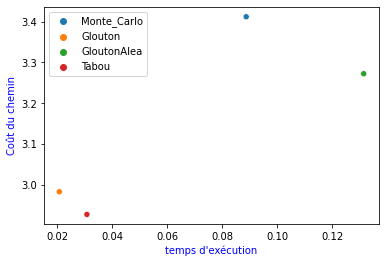

In [ ]:
sns.scatterplot(List_temps, List_dist, data=df,hue=List_Algo)
plt.xlabel("temps d'exécution",color='blue')
plt.ylabel('Coût du chemin', color='blue')

#Test 2 : n=20

In [ ]:
List_temps=[]
List_dist=[]
List_Algo=['Monte_Carlo','Glouton','GloutonAlea','Tabou']

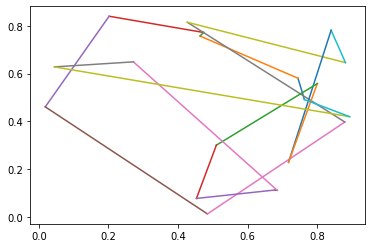

In [ ]:
n=20
N=1000
K=25
coords = np.random.random(2 *n)
coords = coords.reshape(n, 2)
Pb=ProbVC(coords)
Pb.affichage()
sol=solution_hasard(Pb)


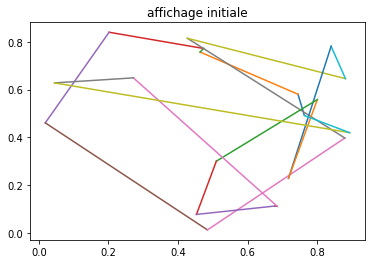

In [ ]:
Pb.affichage()
plt.title('affichage initiale')
plt.show()

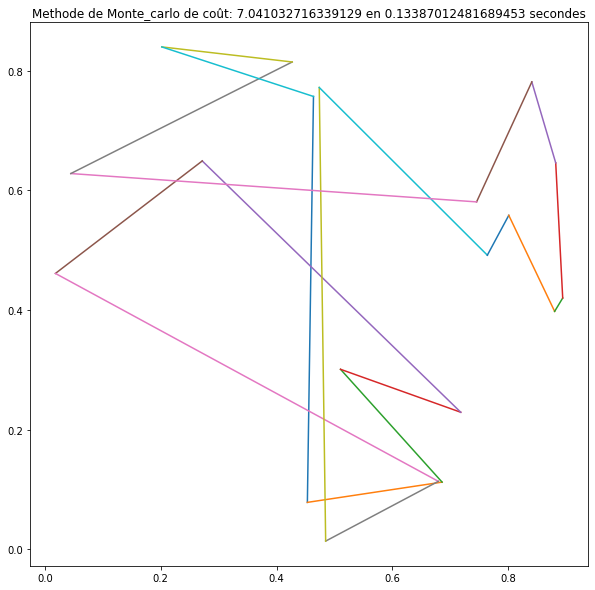

In [ ]:
start_time = time.time()
Solution=Mont_carlo(N,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='Monte_carlo')
plt.title('Methode de Monte_carlo de coût: ' + str(Pb.coût(Solution))+ ' en ' + str(total_time) + ' secondes')
plt.show()

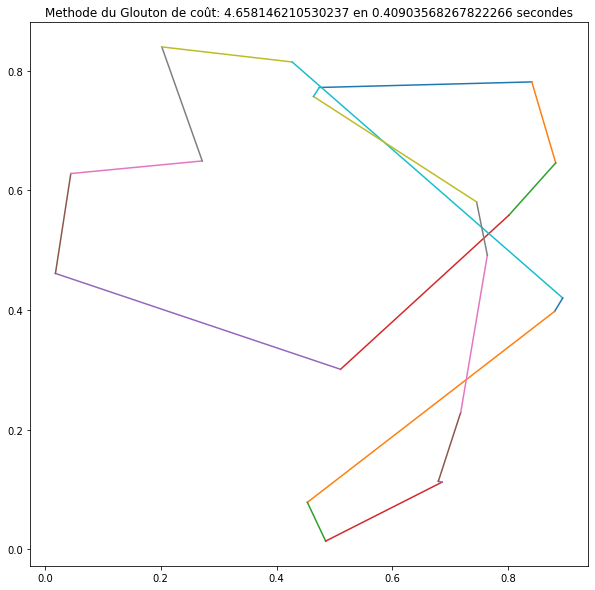

In [ ]:
start_time = time.time()
Solution=Glouton(sol,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='Glouton')
plt.title('Methode du Glouton de coût: ' + str(Pb.coût(Solution)) + ' en ' + str(total_time) + ' secondes')
plt.show()

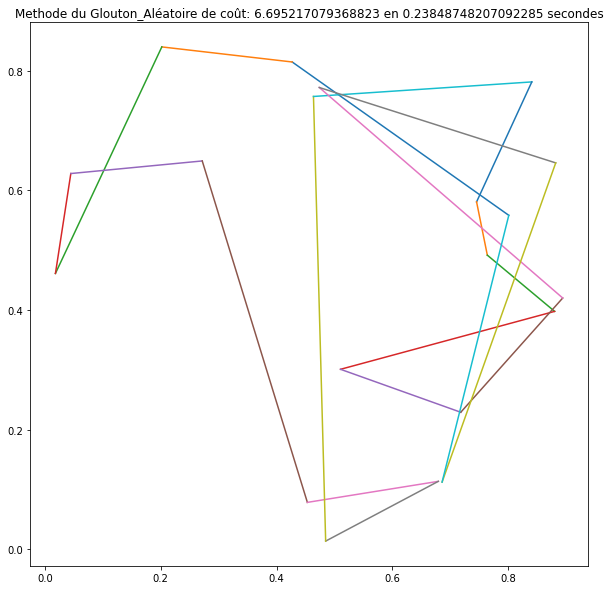

In [ ]:
start_time = time.time()
Solution=GloutonAleat(N,sol,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='GloutonAleat')
plt.title('Methode du Glouton_Aléatoire de coût: ' + str(Pb.coût(Solution)) + ' en ' + str(total_time) + ' secondes')
plt.show()

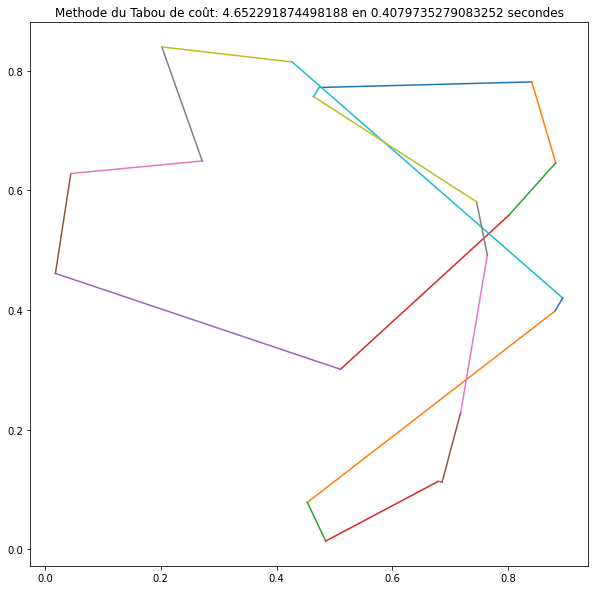

In [ ]:
start_time = time.time()
Solution=Tabou(sol,K,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='Tabou')
plt.title('Methode du Tabou de coût: ' + str(Pb.coût(Solution))+ ' en ' + str(total_time) + ' secondes')
plt.show()

In [ ]:
df = pd.DataFrame(dict(List_Algo=List_Algo,List_temps=List_temps, List_dist=List_dist))

In [ ]:
df

,List_Algo,List_temps,List_dist
0,Monte_Carlo,0.133870,7.041033
1,Glouton,0.409036,4.658146
2,GloutonAlea,0.238487,6.695217
3,Tabou,0.407974,4.652292


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Coût du chemin')

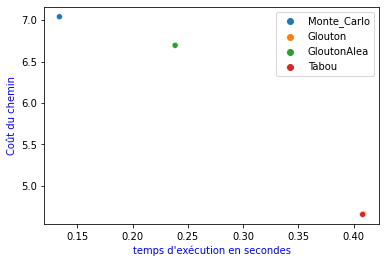

In [ ]:
sns.scatterplot(List_temps, List_dist, data=df,hue=List_Algo)
plt.xlabel("temps d'exécution en secondes",color='blue')
plt.ylabel('Coût du chemin', color='blue')

#Test 3 : n=40

In [ ]:
List_temps=[]
List_dist=[]
List_Algo=['Monte_Carlo','Glouton','GloutonAlea','Tabou']

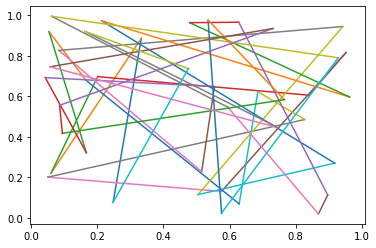

In [ ]:
n=40
N=1000
K=25
coords = np.random.random(2 *n)
coords = coords.reshape(n, 2)
Pb=ProbVC(coords)
Pb.affichage()
sol=solution_hasard(Pb)


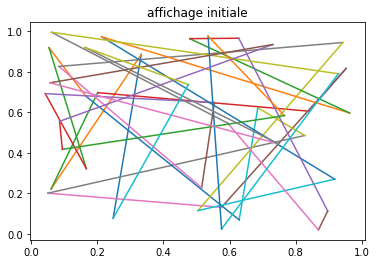

In [ ]:
Pb.affichage()
plt.title('affichage initiale')
plt.show()

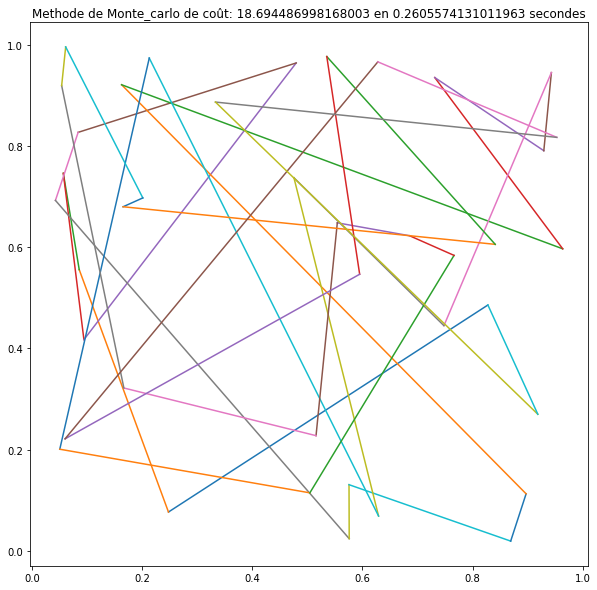

In [ ]:
start_time = time.time()
Solution=Mont_carlo(N,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='Monte_carlo')
plt.title('Methode de Monte_carlo de coût: ' + str(Pb.coût(Solution))+ ' en ' + str(total_time) + ' secondes')
plt.show()

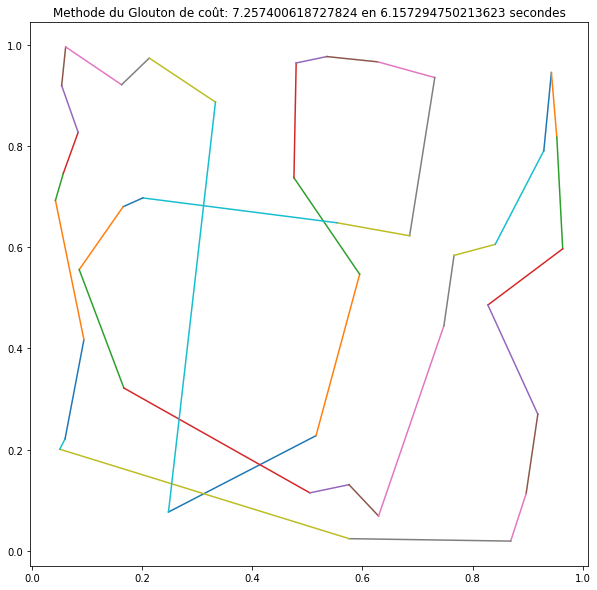

In [ ]:
start_time = time.time()
Solution=Glouton(sol,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='Glouton')
plt.title('Methode du Glouton de coût: ' + str(Pb.coût(Solution)) + ' en ' + str(total_time) + ' secondes')
plt.show()

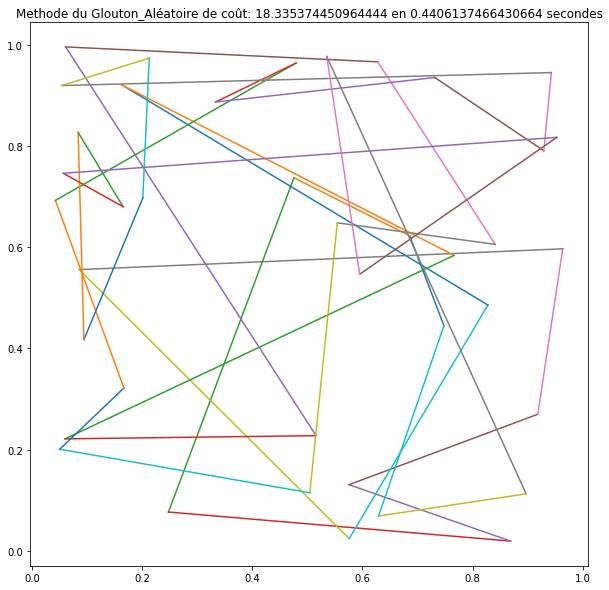

In [ ]:
start_time = time.time()
Solution=GloutonAleat(N,sol,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='GloutonAleat')
plt.title('Methode du Glouton_Aléatoire de coût: ' + str(Pb.coût(Solution)) + ' en ' + str(total_time) + ' secondes')
plt.show()

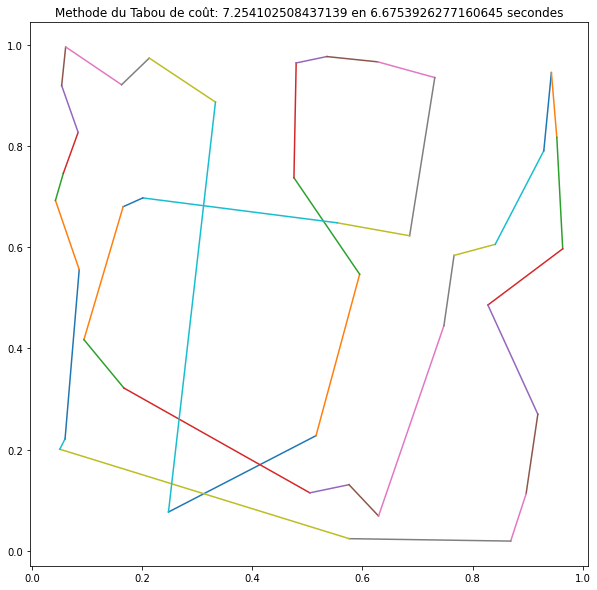

In [ ]:
start_time = time.time()
Solution=Tabou(sol,K,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='Tabou')
plt.title('Methode du Tabou de coût: ' + str(Pb.coût(Solution))+ ' en ' + str(total_time) + ' secondes')
plt.show()

In [ ]:
df = pd.DataFrame(dict(List_Algo=List_Algo,List_temps=List_temps, List_dist=List_dist))

In [ ]:
df

,List_Algo,List_temps,List_dist
0,Monte_Carlo,0.260557,18.694487
1,Glouton,6.157295,7.257401
2,GloutonAlea,0.440614,18.335374
3,Tabou,6.675393,7.254103


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Coût du chemin')

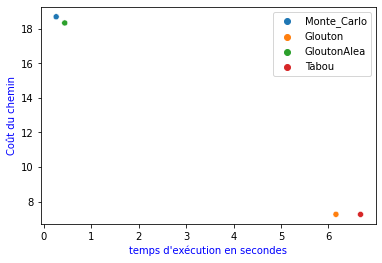

In [ ]:
sns.scatterplot(List_temps, List_dist, data=df,hue=List_Algo)
plt.xlabel("temps d'exécution en secondes",color='blue')
plt.ylabel('Coût du chemin', color='blue')

#Test 4 : n=80

In [ ]:
List_temps=[]
List_dist=[]
List_Algo=['Monte_Carlo','Glouton','GloutonAlea','Tabou']

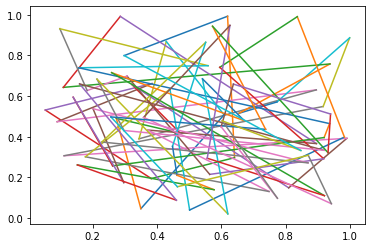

In [ ]:
n=80
N=1000
K=25
coords = np.random.random(2 *n)
coords = coords.reshape(n, 2)
Pb=ProbVC(coords)
Pb.affichage()
sol=solution_hasard(Pb)


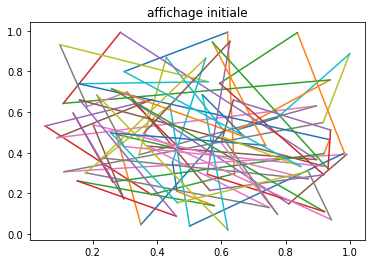

In [ ]:
Pb.affichage()
plt.title('affichage initiale')
plt.show()

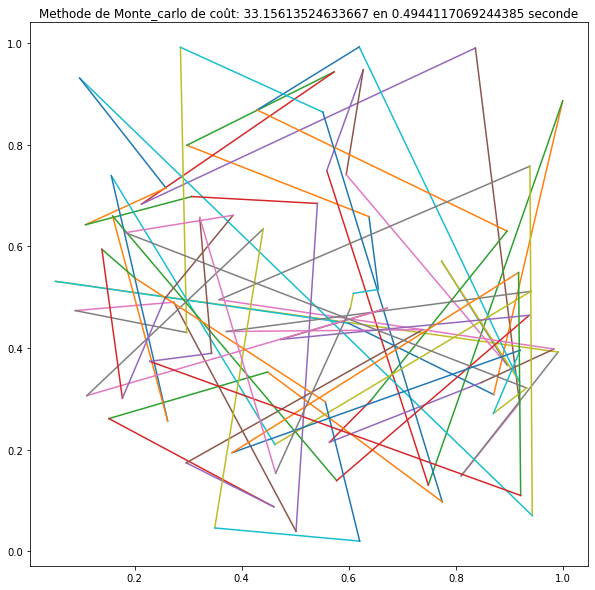

In [ ]:
start_time = time.time()
Solution=Mont_carlo(N,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='Monte_carlo')
plt.title('Methode de Monte_carlo de coût: ' + str(Pb.coût(Solution))+ ' en ' + str(total_time) + ' seconde')
plt.show()

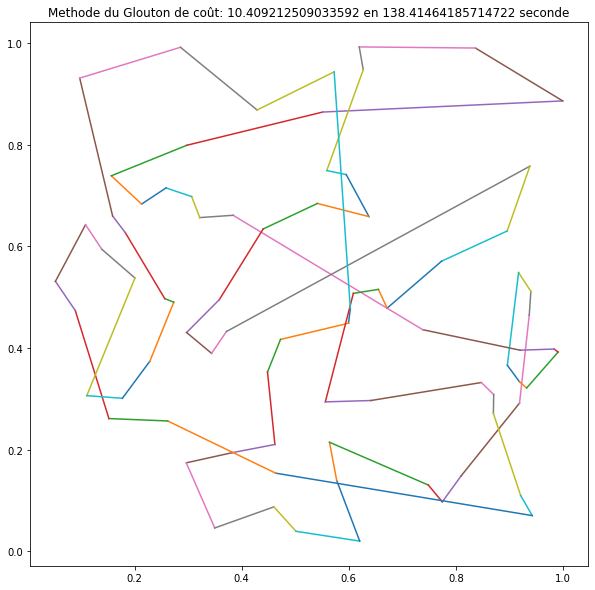

In [ ]:
start_time = time.time()
Solution=Glouton(sol,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='Glouton')
plt.title('Methode du Glouton de coût: ' + str(Pb.coût(Solution)) + ' en ' + str(total_time) + ' seconde')
plt.show()

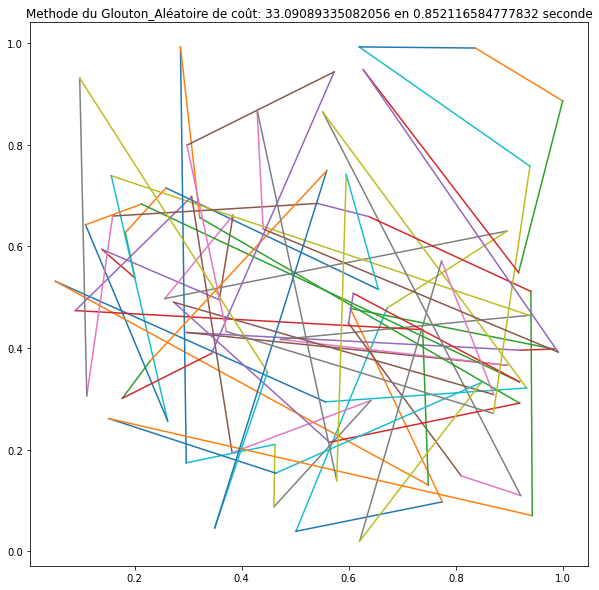

In [ ]:
start_time = time.time()
Solution=GloutonAleat(N,sol,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='GloutonAleat')
plt.title('Methode du Glouton_Aléatoire de coût: ' + str(Pb.coût(Solution)) + ' en ' + str(total_time) + ' seconde')
plt.show()

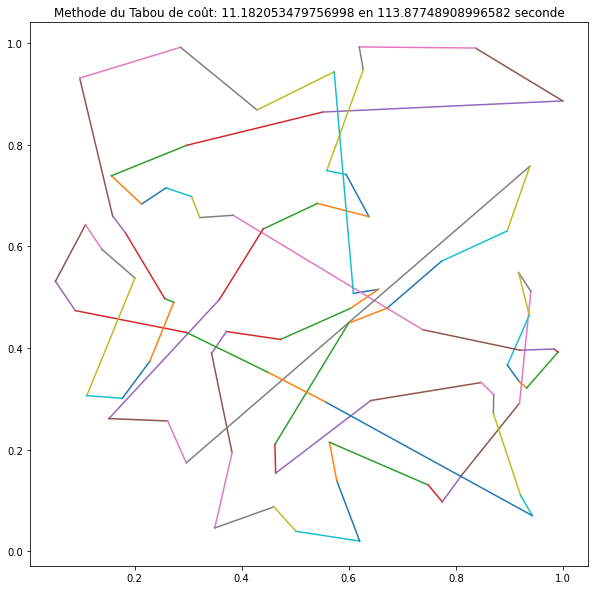

In [ ]:
start_time = time.time()
Solution=Tabou(sol,K,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='Tabou')
plt.title('Methode du Tabou de coût: ' + str(Pb.coût(Solution))+ ' en ' + str(total_time) + ' seconde')
plt.show()

In [ ]:
df = pd.DataFrame(dict(List_Algo=List_Algo,List_temps=List_temps, List_dist=List_dist))

In [ ]:
df

,List_Algo,List_temps,List_dist
0,Monte_Carlo,0.494412,33.156135
1,Glouton,138.414642,10.409213
2,GloutonAlea,0.852117,33.090893
3,Tabou,113.877489,11.182053


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Coût du chemin')

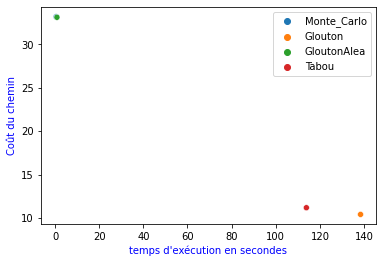

In [ ]:
sns.scatterplot(List_temps, List_dist, data=df,hue=List_Algo)
plt.xlabel("temps d'exécution en secondes",color='blue')
plt.ylabel('Coût du chemin', color='blue')

#Test 5 : n=180

In [ ]:
List_temps=[]
List_dist=[]
List_Algo=['Monte_Carlo','Glouton','GloutonAlea','Tabou']

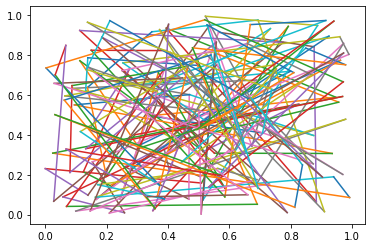

In [ ]:
n=180
N=1000
K=25
coords = np.random.random(2 *n)
coords = coords.reshape(n, 2)
Pb=ProbVC(coords)
Pb.affichage()
sol=solution_hasard(Pb)


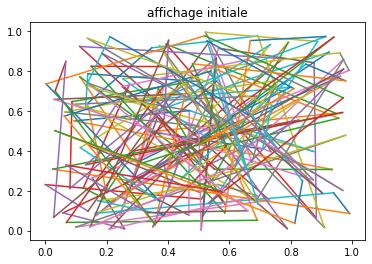

In [ ]:
Pb.affichage()
plt.title('affichage initiale')
plt.show()

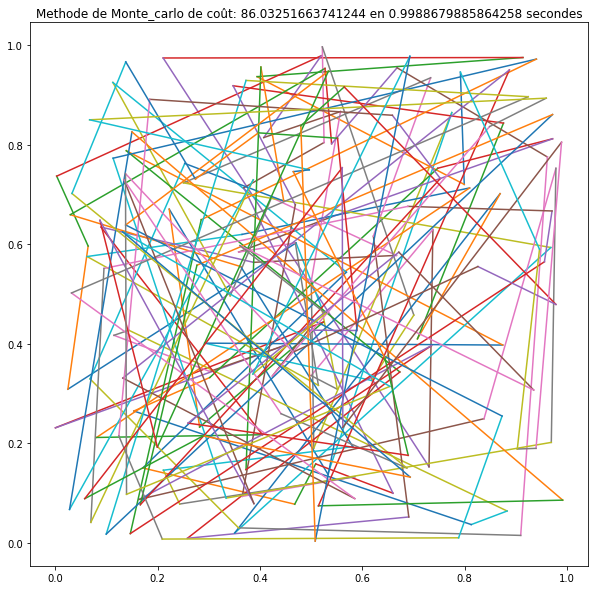

In [ ]:
start_time = time.time()
Solution=Mont_carlo(N,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='Monte_carlo')
plt.title('Methode de Monte_carlo de coût: ' + str(Pb.coût(Solution))+ ' en ' + str(total_time) + ' secondes')
plt.show()

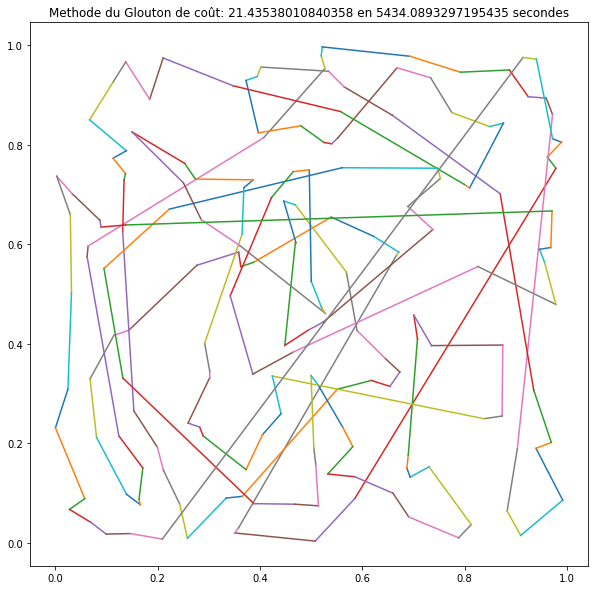

In [ ]:
start_time = time.time()
Solution=Glouton(sol,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='Glouton')
plt.title('Methode du Glouton de coût: ' + str(Pb.coût(Solution)) + ' en ' + str(total_time) + ' secondes')
plt.show()

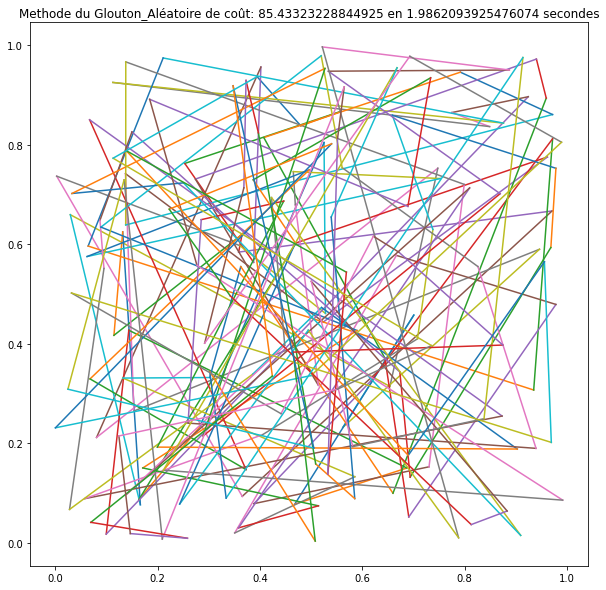

In [ ]:
start_time = time.time()
Solution=GloutonAleat(N,sol,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='GloutonAleat')
plt.title('Methode du Glouton_Aléatoire de coût: ' + str(Pb.coût(Solution)) + ' en ' + str(total_time) + ' secondes')
plt.show()

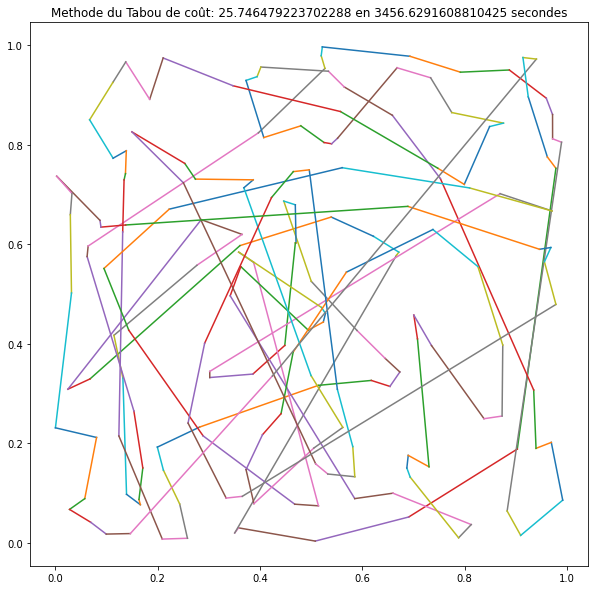

In [ ]:
start_time = time.time()
Solution=Tabou(sol,K,Pb)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)
List_dist.append(Pb.coût(Solution))
plt.figure(figsize=(10,10))
Pb.affichage(Solution,method='Tabou')
plt.title('Methode du Tabou de coût: ' + str(Pb.coût(Solution))+ ' en ' + str(total_time) + ' secondes')
plt.show()

In [ ]:
df = pd.DataFrame(dict(List_Algo=List_Algo,List_temps=List_temps, List_dist=List_dist))

In [ ]:
df

,List_Algo,List_temps,List_dist
0,Monte_Carlo,0.998868,86.032517
1,Glouton,5434.089330,21.435380
2,GloutonAlea,1.986209,85.433232
3,Tabou,3456.629161,25.746479


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Coût du chemin')

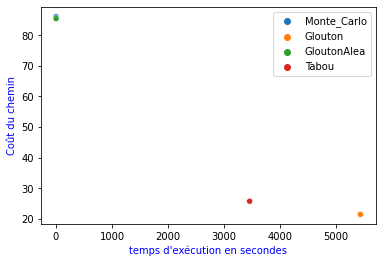

In [ ]:
sns.scatterplot(List_temps, List_dist, data=df,hue=List_Algo)
plt.xlabel("temps d'exécution en secondes",color='blue')
plt.ylabel('Coût du chemin', color='blue')